# Terra's Orbit

<i>© Von P. Walden, Washington State University</i>

This notebook describes how to use the PyEphem module to calculate ephemeris data for NASA Terra's satellite.  It relies on up-to-date orbital "two-line element" (TLE) data from NORAD; http://celestrak.com/NORAD/elements/science.txt

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
import ephem
from urllib.request import urlopen

# Obtain the most recent orbital "elements" data from NORAD auto-magically!
TLEs = urlopen('http://celestrak.com/NORAD/elements/science.txt').readlines()
for i,TLE in enumerate(TLEs):
    if TLE.decode('utf-8').count('TERRA'):
        l1 = TLEs[i].strip().decode('utf-8')
        l2 = TLEs[i+1].strip().decode('utf-8')
        l3 = TLEs[i+2].strip().decode('utf-8')
terra = ephem.readtle(l1,l2,l3)

In [31]:
TLEs

[b'AKEBONO (EXOS-D)        \r\n',
 b'1 19822U 89016A   19234.52026101  .00015790  17373-7  27663-3 0  9999\r\n',
 b'2 19822  75.0245  72.8425 1779513  52.0180 322.8624 11.97938373  3522\r\n',
 b'HST                     \r\n',
 b'1 20580U 90037B   19235.16229455  .00000304  00000-0  75279-5 0  9990\r\n',
 b'2 20580  28.4691 139.0064 0002888 109.8785  41.4690 15.09255826410792\r\n',
 b'POLAR                   \r\n',
 b'1 23802U 96013A   19231.25437354  .00000205  00000-0  00000-0 0  9990\r\n',
 b'2 23802  78.6991 254.1971 6637038 293.3752  12.3866  1.29845722112459\r\n',
 b'SWAS                    \r\n',
 b'1 25560U 98071A   19235.47417831  .00000011  00000-0  96096-5 0  9995\r\n',
 b'2 25560  69.8983  55.8238 0005439  57.6060 302.5622 14.93763680124597\r\n',
 b'ORSTED                  \r\n',
 b'1 25635U 99008B   19235.25240284  .00000006  00000-0  93547-5 0  9993\r\n',
 b'2 25635  96.4843 324.3903 0137568 224.5848 134.4219 14.48161284 81589\r\n',
 b'CXO                     \r\n',
 b'1 2

The TLE data format is explained here: https://en.wikipedia.org/wiki/Two-line_element_set

b'TERRA                   \r\n',
 b'1 25994U 99068A   19233.87854381 -.00000044  00000-0  22564-6 0  9997\r\n',
 b'2 25994  98.2014 307.4535 0001211 111.3085 248.8225 14.57116811 46541\r\n',


In [32]:
from datetime import datetime, timedelta

# Create datetimes for the next three days.
numberOfDays = 1
now = datetime.date(datetime.now())
midnight = datetime(now.year, now.month, now.day, 0, 0)
dt  = [midnight + timedelta(minutes=x) for x in range(0, numberOfDays*24*60, 1)]

# Compute ground track locations at each datetime
sublon, sublat = np.array([]), np.array([])
for date in dt:
    terra.compute(date)
    sublon = append(sublon, np.rad2deg(terra.sublong)+180.)
    sublat = append(sublat, np.rad2deg(terra.sublat))


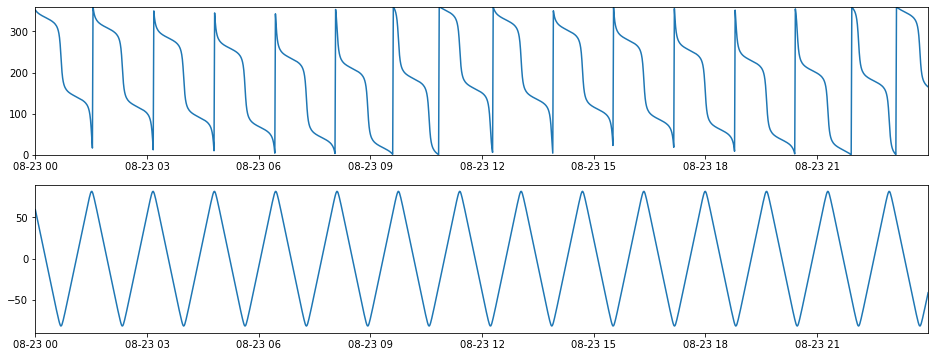

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize(16,6))
ax = plt.subplot(2,1,1)
ax.axis([min(dt), max(dt), 0, 360])
plot(dt,sublon)
ax = plt.subplot(2,1,2)
ax.axis([min(dt), max(dt), -90, 90])
plot(dt,sublat)

In [38]:
# Current location of satellite.
terra.compute(datetime.now())
x, y  = (sublon, sublat)
x2,y2 = (np.rad2deg(terra.sublong)+180.,np.rad2deg(terra.sublat))

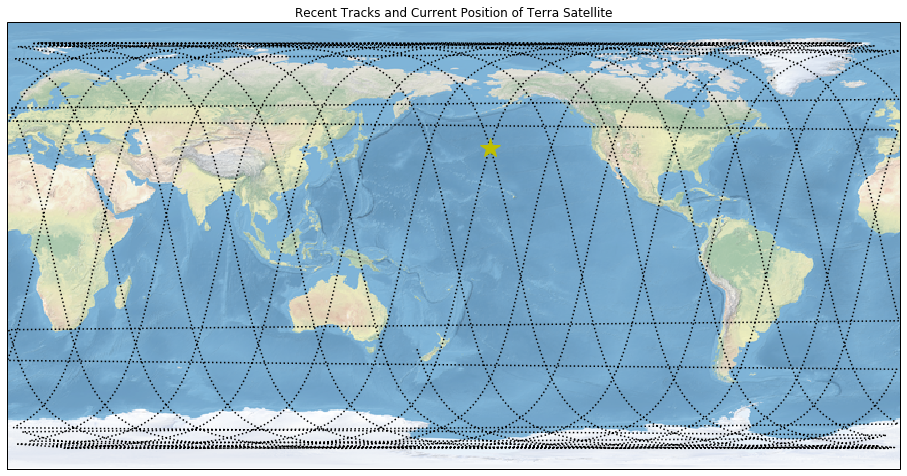

In [39]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

ax.set_title('Recent Tracks and Current Position of Terra Satellite')
ax.stock_img()
ax.plot(x,y,'k:',x2,y2,'y*',markersize=20, transform=ccrs.PlateCarree())
plt.show()
